In [25]:
import sys
sys.path.append(r'..')
import os
import numpy as np
import json
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import math
import statistics
import pickle as pkl
import torch
from scipy import optimize
from BTS_Method.expression_tree import simplify_equation, calc_r_squared, reward_func, BIC_np_calc_loss
from Bayesian.simple_do import BIC_distribution_optimization, BIC_calc_loss

In [115]:
# Load Dataset
with open(os.getcwd() + "\\..\\functions\\Feynman_2_6_15a_v0.pkl", 'rb') as file:
    dataset = pkl.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Zak Bastiani\\PycharmProjects\\RNNSymbolicRegression\\functions\\..\\functions\\nguyen_RNN_0_1.pkl'

In [4]:
for key in dataset.keys():
    if key in ["X", "Y", "Noise"]:
        print(f"{key}: {torch.tensor(dataset[key]).shape}")
    else:
        print(f"{key}: {dataset[key]}")

X: torch.Size([6, 100])
Y: torch.Size([100])
Function: x[0]/(c[0] * c[1] * x[1]) * (c[2] * x[2])/(x[3]**c[3]) * torch.sqrt(x[4]**c[4] + x[5]**c[5])
Constants: tensor([4.0000, 3.1416, 3.0000, 5.0000, 2.0000, 2.0000])
Test_X: tensor([[7.1900, 7.3175, 3.9657,  ..., 4.4705, 6.0956, 5.6430],
        [4.6809, 3.3828, 4.0859,  ..., 3.5534, 5.8573, 3.1061],
        [8.9713, 6.0257, 7.3593,  ..., 6.9122, 4.8376, 5.2654],
        [3.5128, 6.0755, 6.0218,  ..., 5.5697, 7.8370, 8.0746],
        [5.8193, 7.2211, 7.2237,  ..., 4.7607, 4.6520, 5.0978],
        [6.9868, 6.6089, 5.0772,  ..., 6.9779, 8.0496, 6.5680]],
       dtype=torch.float64)
Test_Y: tensor([0.0559, 0.0037, 0.0019,  ..., 0.0033, 0.0004, 0.0006],
       dtype=torch.float64)


C:\Users\Zak Bastiani\AppData\Local\Temp\ipykernel_3412\3781353548.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(f"{key}: {torch.tensor(dataset[key]).shape}")


C:\Users\Zak Bastiani\AppData\Local\Temp\ipykernel_3412\419389343.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(dataset["X"])
C:\Users\Zak Bastiani\AppData\Local\Temp\ipykernel_3412\419389343.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_noisy = torch.tensor(dataset["Y"])


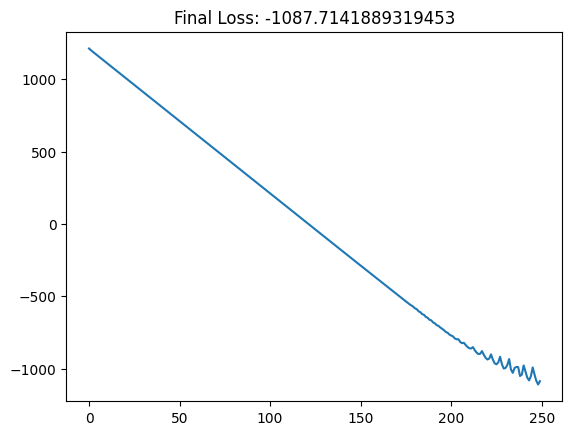

Constants: tensor([[1.7428],
        [1.4770],
        [0.8602],
        [4.9954],
        [1.6314],
        [1.6959]])
R2: 0.9965266250620503
tensor(1087.7142, dtype=torch.float64)


In [54]:
equ = dataset["Function"]
var_count = 6
x = torch.tensor(dataset["X"])
y_noisy = torch.tensor(dataset["Y"])
c_pred, v_pred, loss, losses = BIC_distribution_optimization(x, y_noisy, equ, var_count)
plt.plot(range(len(losses)), losses)
plt.title(f"Final Loss: {loss}")
plt.show()

print(f"Constants: {c_pred}")
c = c_pred
mu = torch.mean(y_noisy)
normalizer = torch.sum((y_noisy - mu)**2)
print(f"R2: {1 - torch.sum((y_noisy - eval(equ))**2)/normalizer}")
print(-BIC_calc_loss(c_pred, v_pred, var_count, x, y_noisy, equ))

In [113]:
equ = "x[0]/(c[0] * c[1] * x[1]) * (c[2] * x[2])/(x[3]**c[3]) * np.sqrt(x[4]**c[4] + x[5]**c[5])"
var_count = 6
x = np.array(dataset["X"])
y = np.array(dataset["Y"])
const = np.random.rand(var_count + 1)

def func(c):
    s_x = eval(equ)
    return 0.5 * np.log(c[-1]) + 0.5 * math.log(2 * math.pi) + 0.5 * (y - s_x)**2/c[-1]

info = optimize.least_squares(func, const, method='lm')
const = info.x
print(f"Constants: {const}")
c = const
mu = np.mean(y)
normalizer = np.sum((y - mu)**2)
print(f"R2: {1 - np.sum((y - eval(equ))**2)/normalizer}")
v = np.mean((eval(equ) - y) ** 2)
print(-BIC_np_calc_loss(const, v, var_count, x, y, equ))

Constants: [0.88274299 0.20759016 0.04374742 4.99999998 1.99999998 1.99999998
 0.15915494]
R2: 1.0
4456.2539446259525


C:\Users\Zak Bastiani\AppData\Local\Temp\ipykernel_14968\2666360281.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_noisy = torch.tensor(dataset["Y"] + dataset["Noise"])


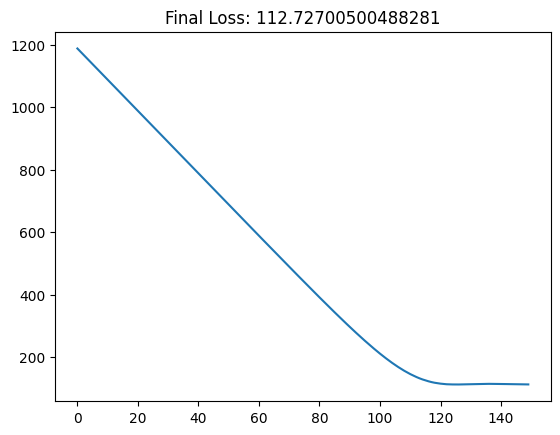

In [13]:
equ = dataset["Function"] + "+c[0]"
var_count = 1
x = torch.tensor(dataset["X"])
y_noisy = torch.tensor(dataset["Y"] + dataset["Noise"])
c_pred, v_pred, loss, losses = BIC_distribution_optimization(x, y_noisy, equ, var_count)
plt.plot(range(len(losses)), losses)
plt.title(f"Final Loss: {loss}")
plt.show()

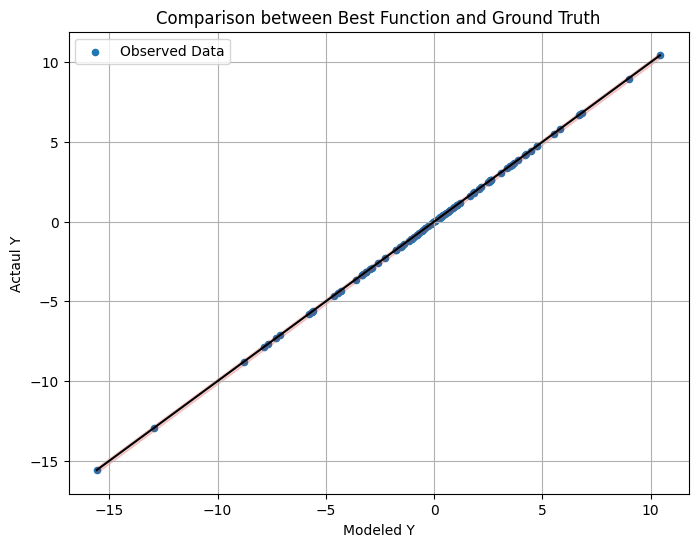

tensor(0.1657)


In [14]:
# Plotting
c = c_pred
v = v_pred
y_pred = eval(equ)
y_real = dataset["Y"]
plt.figure(figsize=(8, 6))
plt.title("Comparison between Best Function and Ground Truth")
plt.scatter(y_pred, y_real, label="Observed Data", s=20)
X = np.linspace(min(y_real), max(y_real), 100)
plt.plot(X, X, color="black")
color = 'tab:red'
plt.fill_between(X, X - v.item(),
                 X + v.item(), color=color, alpha=0.2)

plt.xlabel("Modeled Y")
plt.ylabel("Actaul Y")
plt.legend()
plt.grid(True)
plt.show() 
print(v)

In [6]:
equ = "x[0]/(c[0] * c[1] * x[1]) * (c[2] * x[2])/(x[3]**c[3]) * torch.sqrt(x[4]**c[4] + x[5]**c[5])"
x = torch.tensor(np.random.uniform(3, 9, (6, 100)))
c = torch.tensor([4, torch.pi, 3, 5, 2, 2])
y = eval(equ)
dataset = {"X": x, "Y": y, "Function": equ, "Constants": c}
test_x = torch.tensor(np.random.uniform(3, 9, (6, 10000)))
x = test_x
test_y = eval(equ)
dataset["Test_X"] = test_x
dataset["Test_Y"] = test_y

In [7]:
equ = "x[0]/(c[0] * x[1]) * (x[2])/(x[3]**c[1]) * torch.sqrt(x[4]**2 + x[5]**2)"
var_count = 2
y_noisy = y + noise
c_pred, v_pred, loss, losses = BIC_distribution_optimization(x, y_noisy, equ, var_count)
plt.plot(range(len(losses)), losses)
plt.title(f"Final Loss: {loss}")
plt.show()

NameError: name 'noise' is not defined

In [7]:
# Plotting
c = c_pred
v = v_pred
y_pred = eval(equ)
y_real = dataset["Y"]
plt.figure(figsize=(8, 6))
plt.title("Comparison between Best Function and Ground Truth")
plt.scatter(y_pred, y_real, label="Observed Data", s=20)
X = np.linspace(min(y_real), max(y_real), 100)
plt.plot(X, X, color="black")
color = 'tab:red'
plt.fill_between(X, X - v.item(),
                 X + v.item(), color=color, alpha=0.2)

plt.xlabel("Modeled Y")
plt.ylabel("Actaul Y")
plt.legend()
plt.grid(True)
plt.show() 
print(v)

NameError: name 'dataset' is not defined

In [36]:
# Creating Dataset
with open(os.getcwd() + "\\..\\functions\\Feynman_2_6_15a_v0.pkl", 'wb') as file:
    pkl.dump(dataset, file)